# **Heart Disease Prediction**

# *This project aims to develop a binary classification model to predict whether a peson has heart disease or not. We'll utilize machine learning algorithms to analyze data containing various patient factors. The model will learn to identify patterns associated with heart disease and predict its presence in new individuals. This can be a valuable tool for early detection and preventative measures.*

# Importing the Libraries




In [ ]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Dataset

In [ ]:
df=pd.read_csv('/content/sample_data/heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info


<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]>

# Prepare the Data

**[ i ]  Separating Input and Target Variable**




In [ ]:
X=df.drop('target',axis=1)

Y=df['target']

**[ ii ]  Splitting the Dataset into Training and Testing Datasets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

# **Our model architecture:**
There are two key architecture decisions to be made about such a stack of Dense layers:
1. How many layers to use
2. How many hidden units to choose for each layer

For our model, we'll be considering the following:

•Input = the no. of features in X_train = 13

• No. of neurons/units in first Dense layer = 32

• No. of neurons/units in second Dense layer = 16

• No. of neurons/units in third Dense layer = 8

• No. of neurons/units in output layer = 1

In [ ]:
# Import Libraries for building sequential models with dense layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
# Building the model
# Defining the Sequential model.
model = Sequential()

# Adding Input Layer and passing number of features to it
input_dims = X_train.shape[1]
model.add(tf.keras.Input (shape=(input_dims,), name="input_layer"))

# Adding 3 Dense Layers one by one with activation functions
model.add(Dense(32, activation='relu', name="hidden_layer1"))   # input_shape=(input_dims,)
model.add(Dense(16, activation='relu', name="hidden_layer2"))
model.add(Dense(8, activation='relu', name="hidden_layer3"))

# Adding an Output Layer
model.add(Dense(1, activation='sigmoid', name="output_layer"))

In [ ]:
#print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 32)                448       
                                                                 
 hidden_layer2 (Dense)       (None, 16)                528       
                                                                 
 hidden_layer3 (Dense)       (None, 8)                 136       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


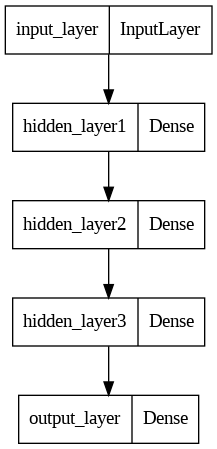

In [ ]:
#Plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

# **Compile a neural network**

In [ ]:
# Import the Optimizer
from tensorflow.keras.optimizers import RMSprop

# Define the Optimizer
optimizer = RMSprop(0.001)           # Here, we have set our learning rate as 0.001

# Compile the model
model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])

**Training a neural network**

In [ ]:
# Define the batch_size and number of epochs
batch_size = 128      #batch_size should always be in the form of 2^n where n 1,2,3,4,....
num_epochs = 20

# Fit a neural network or train a neural network
multiclass_classifier = model.fit(X_train, Y_train, validation_split=0.2, epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/20
2/2 [==============================] - 1s 287ms/step - loss: 19.2673 - accuracy: 0.5440 - val_loss: 9.2698 - val_accuracy: 0.5714
Epoch 2/20
2/2 [==============================] - 0s 58ms/step - loss: 11.0278 - accuracy: 0.5440 - val_loss: 5.4386 - val_accuracy: 0.5918
Epoch 3/20
2/2 [==============================] - 0s 53ms/step - loss: 6.9241 - accuracy: 0.5389 - val_loss: 3.0367 - val_accuracy: 0.5102
Epoch 4/20
2/2 [==============================] - 0s 38ms/step - loss: 4.2455 - accuracy: 0.5130 - val_loss: 2.1781 - val_accuracy: 0.5510
Epoch 5/20
2/2 [==============================] - 0s 56ms/step - loss: 3.0029 - accuracy: 0.4611 - val_loss: 1.8231 - val_accuracy: 0.4694
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 2.3666 - accuracy: 0.4301 - val_loss: 1.5616 - val_accuracy: 0.4286
Epoch 7/20
2/2 [==============================] - 0s 52ms/step - loss: 1.9294 - accuracy: 0.4404 - val_loss: 1.2786 - val_accuracy: 0.4694
Epoch 8/20
2/2 [========

#**Evaluate a trained network**

In [ ]:
# Evaluating our neural network using test dataset
score = model.evaluate(x=X_test, y=Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.5788058638572693
Test accuracy: 0.7377049326896667


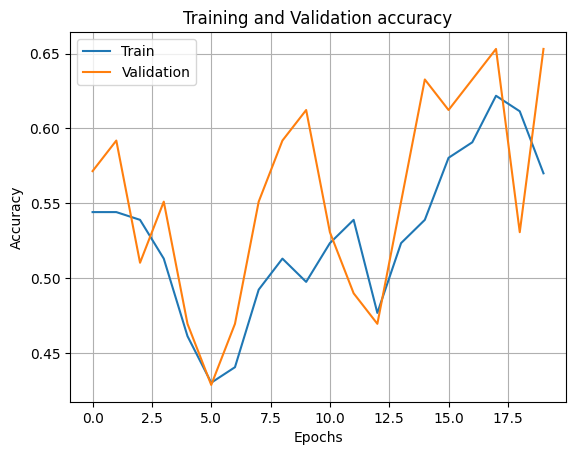

In [ ]:
# Plot training accuracy and validation accuracy
plt.plot(multiclass_classifier.history['accuracy'])
plt.plot(multiclass_classifier.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

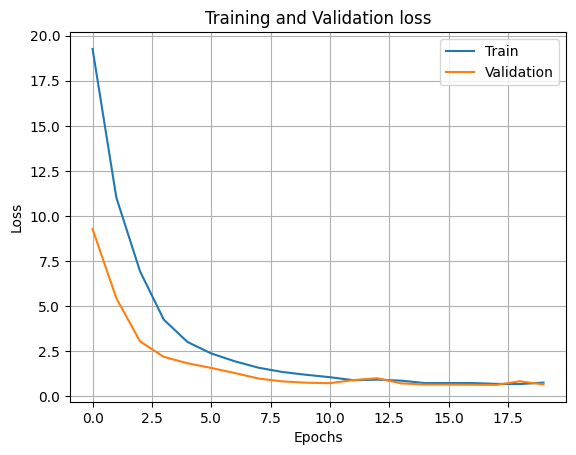

In [ ]:
# Plot training loss and validation loss
plt.plot(multiclass_classifier.history['loss'])
plt.plot(multiclass_classifier.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

#**Inference or prediction using a trained neural network**

In [ ]:
#Prediction on test dataset using predict() function
Y_pred = model.predict(X_test)
Y_pred[:10]

2/2 [==============================] - 0s 7ms/step


array([[0.17114282],
       [0.14930962],
       [0.7642946 ],
       [0.42292365],
       [0.58128047],
       [0.57278335],
       [0.2849131 ],
       [0.1467245 ],
       [0.3234956 ],
       [0.4587376 ]], dtype=float32)

In [ ]:
#Decision Boundary Threshold, if probability > 0.5 then heart disease is present else heart disease is not present
Y_pred = (Y_pred > 0.5)
Y_pred[:10]

array([[False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False]])

#**Plot a Confusion Matrix and Classification Report**

In [ ]:
#Import libraries for plotting Confusion Matrix and Classification Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_curve
import seaborn as sns

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(Y_test, Y_predict):
   cm = confusion_matrix(Y_test, Y_predict)
   print(cm)
   labels = ['Not Present', 'Present']
   # Color Map
   cmap=sns.light_palette("blue")

  #Plot Confusion Matrix
   plt.figure(figsize=(4,4))
   sns.heatmap(cm , annot = True, cmap = cmap, fmt = ".3f", xticklabels = labels, yticklabels = labels)
   plt.xlabel('Predicted Values')
   plt.ylabel('Actual Values')
   plt.title("Confusion matrix")
   plt.show()

   print()
   print('-'*100)
   print ("Classification Report:\n",classification_report(Y_test, Y_predict))
   print ("Accuracy Score:"+str(accuracy_score(Y_test, Y_predict)*100))
   fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
   print("AUC Score:", auc(fpr,tpr))



In [ ]:
# check shape of dataset
Y_test.shape

(61,)

In [ ]:
#check distribution of each class
Y_test.value_counts()

1    32
0    29
Name: target, dtype: int64

[[27  2]
 [14 18]]


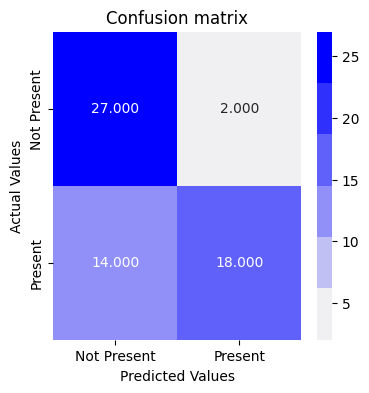


----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.93      0.77        29
           1       0.90      0.56      0.69        32

    accuracy                           0.74        61
   macro avg       0.78      0.75      0.73        61
weighted avg       0.79      0.74      0.73        61

Accuracy Score:73.77049180327869
AUC Score: 0.7467672413793103


In [ ]:
# Plotting confusion matrix & classification report
plot_confusion_matrix(Y_test,Y_pred)